In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import folium

# read csv file
df_HPD = pd.read_csv('HPDComplaint.csv',parse_dates=['created_date','closed_date'])
df_HPD.drop('Unnamed: 0',axis=1,inplace=True)
df_HPD.tail()

,unique_key,created_date,complaint_type,status,resolution_description,location_type,borough,incident_zip,incident_address,street_name,address_type,city,latitude,longitude,closed_date
5902467,44063724,2019-10-15 10:54:45,HEAT/HOT WATER,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,MANHATTAN,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,ADDRESS,NEW YORK,40.864764,-73.922764,2019-10-16 18:14:29
5902468,44063726,2019-10-15 14:07:34,HEAT/HOT WATER,Closed,The Department of Housing Preservation and Dev...,RESIDENTIAL BUILDING,BRONX,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,40.883207,-73.884279,2019-10-16 19:10:19
5902469,44063731,2019-10-15 09:49:04,UNSANITARY CONDITION,Open,The following complaint conditions are still o...,RESIDENTIAL BUILDING,MANHATTAN,10039.0,101 WEST 147 STREET,WEST 147 STREET,ADDRESS,NEW YORK,40.821922,-73.935720,NaT
5902470,44063737,2019-10-15 11:29:01,PAINT/PLASTER,Closed,The Department of Housing Preservation and Dev...,RESIDENTIAL BUILDING,MANHATTAN,10009.0,143 AVENUE D,AVENUE D,ADDRESS,NEW YORK,40.724749,-73.975269,2019-10-15 21:19:45
5902471,44063798,2019-10-15 14:01:51,UNSANITARY CONDITION,Open,The following complaint conditions are still o...,RESIDENTIAL BUILDING,BROOKLYN,11208.0,901 DREW STREET,DREW STREET,ADDRESS,BROOKLYN,40.667414,-73.860358,NaT


In [2]:
# size of df; check if any NA values
print('data types of df_HPD:\n',df_HPD.dtypes)
print('\nshape of df_HPD:', df_HPD.shape)       # 5902472X15
# df_HPD.isnull().any()
print('\nnumber of NA:\n',df_HPD.isnull().sum(),'\n')
df_HPD.complaint_type.value_counts().sort_values(ascending=False)

data types of df_HPD:
 unique_key                         int64
created_date              datetime64[ns]
complaint_type                    object
status                            object
resolution_description            object
location_type                     object
borough                           object
incident_zip                     float64
incident_address                  object
street_name                       object
address_type                      object
city                              object
latitude                         float64
longitude                        float64
closed_date               datetime64[ns]
dtype: object

shape of df_HPD: (5902472, 15)

number of NA:
 unique_key                     0
created_date                   0
complaint_type                 0
status                         0
resolution_description      7819
location_type              52830
borough                        0
incident_zip               80631
incident_address           52831
str

HEAT/HOT WATER            1176400
HEATING                    887869
PLUMBING                   705922
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       443555
PAINT - PLASTER            361258
PAINT/PLASTER              343213
ELECTRIC                   304986
NONCONST                   260890
DOOR/WINDOW                202119
WATER LEAK                 190332
GENERAL                    148445
FLOORING/STAIRS            136203
APPLIANCE                  111032
HPD Literature Request      52830
SAFETY                      50691
OUTSIDE BUILDING             7076
ELEVATOR                     6568
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric      

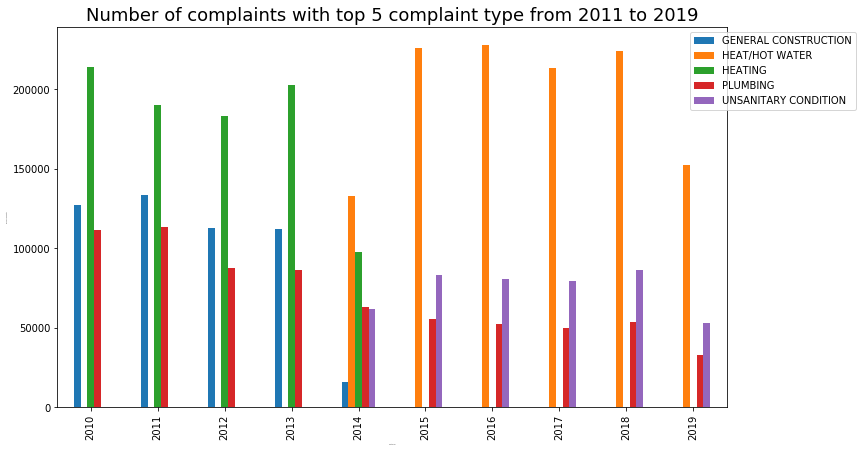

In [3]:
# plot top 5 complaint type
df_HPD['created_year'] = df_HPD['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
df_HPD[df_HPD['complaint_type'].isin(['HEAT/HOT WATER','HEATING','PLUMBING','GENERAL CONSTRUCTION','UNSANITARY CONDITION'])]\
                                .groupby(['created_year','complaint_type']).count()['unique_key'].unstack()\
                                .plot(kind='bar',figsize=(12,7))
plt.xlabel('Created Year',fontsize=1)
plt.ylabel('Number of Complaints',fontsize=1)
plt.title('Number of complaints with top 5 complaint type from 2010 to 2019',fontsize=18)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

* ### The figure above indicates that before 2014 HPD received most complaints about heating while about heat/hot water after 2014. The type of complaints The Department of Housing Preservation and Development of New York City should focus first are the ones related to heating issues. 

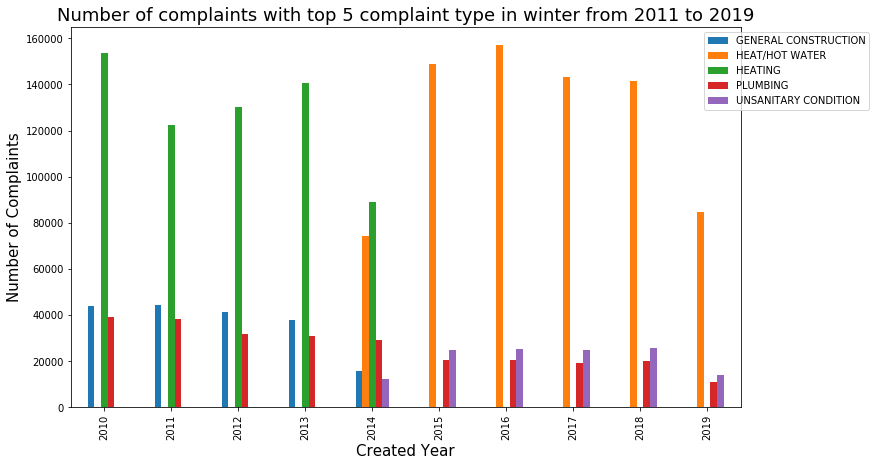

In [4]:
# plot the top 5 complaint type in winter through the years
df_HPD['created_month'] = df_HPD['created_date'].map(lambda x: x.strftime('%m')).astype(int)
df_HPD[(df_HPD['complaint_type'].isin(['HEAT/HOT WATER','HEATING','PLUMBING','GENERAL CONSTRUCTION','UNSANITARY CONDITION']))\
         & (df_HPD['created_month'].isin([11,12,1,2]))]\
                                .groupby(['created_year','complaint_type']).count()['unique_key'].unstack()\
                                .plot(kind='bar',figsize=(12,7))
plt.xlabel('Created Year',fontsize=15)
plt.ylabel('Number of Complaints',fontsize=15)
plt.title('Number of complaints with top 5 complaint type in winter from 2011 to 2019',fontsize=18)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))

* ### The overall complaints received by HPD was dominated by the heating-related complaints during winter from 2010 to 2019 in NYC. 

In [5]:
# create a new dataframe for the most popular complaints (heating-related)
df_HPD['incident_zip'] = df_HPD['incident_zip'].astype('Int64')
df_HPD.set_index('complaint_type',inplace=True)
df_area = df_HPD.loc[['HEAT/HOT WATER','HEATING'],:]
print('sorted number of complaints according to boroughs:\n',df_area.borough.value_counts().sort_values(ascending=False),'\n')
df_area.tail()

sorted number of complaints according to boroughs:
 BRONX            576646
BROOKLYN         550506
MANHATTAN        404536
Unspecified      282917
QUEENS           232016
STATEN ISLAND     17648
Name: borough, dtype: int64 



,unique_key,created_date,status,resolution_description,location_type,borough,incident_zip,incident_address,street_name,address_type,city,latitude,longitude,closed_date,created_year,created_month
complaint_type,,,,,,,,,,,,,,,,
HEATING,27619058,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10453,170 WEST BURNSIDE AVENUE,WEST BURNSIDE AVENUE,ADDRESS,BRONX,40.854288,-73.915670,2014-03-11,2014,3
HEATING,27619063,2014-03-10,Open,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10466,645 EAST 228 STREET,EAST 228 STREET,ADDRESS,BRONX,40.890578,-73.861321,NaT,2014,3
HEATING,27619064,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,MANHATTAN,10031,469 WEST 147 STREET,WEST 147 STREET,ADDRESS,NEW YORK,40.826214,-73.945891,2014-03-12,2014,3
HEATING,27619065,2014-03-10,Closed,The Department of Housing Preservation and Dev...,RESIDENTIAL BUILDING,BROOKLYN,11226,2005 ALBEMARLE ROAD,ALBEMARLE ROAD,ADDRESS,BROOKLYN,40.647282,-73.960198,2014-03-12,2014,3
HEATING,27619069,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10454,526 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,40.807271,-73.918561,2014-03-12,2014,3


Text(0.5, 1.0, 'Number of complaints in different boroughs from 2011 to 2019')

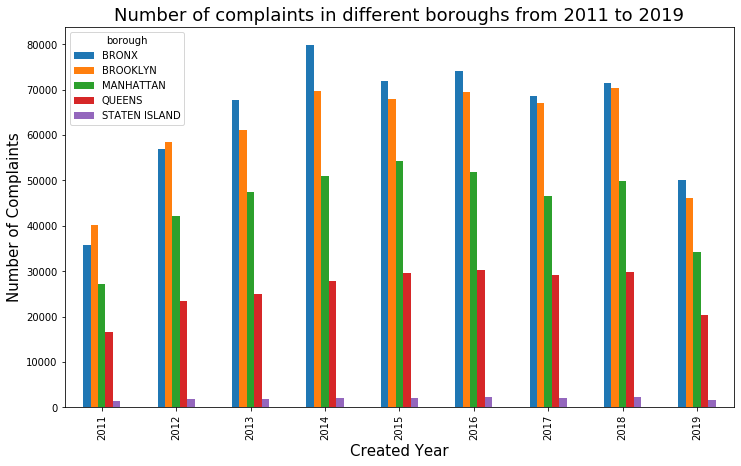

In [6]:
# make a bar plot to show number of complaints in different boroughs for heating-related complaints from 2011 to 2019
df_area[df_area['created_year']>2010]\
                                    .groupby(['created_year','borough']).count()['unique_key']\
                                    .unstack().drop('Unspecified',axis=1)\
                                    .plot(kind='bar',figsize=(12,7))      # not specified boroughs before 2011
plt.xlabel('Created Year',fontsize=15)
plt.ylabel('Number of Complaints',fontsize=15)
plt.title('Number of complaints in different boroughs from 2011 to 2019',fontsize=18)

* ### The figure above indicates that before 2014 HPD received most complaints about heating while about heat/hot water after 2014. The type of complaints The Department of Housing Preservation and Development of New York City should focus first are the ones related to heating issues. 

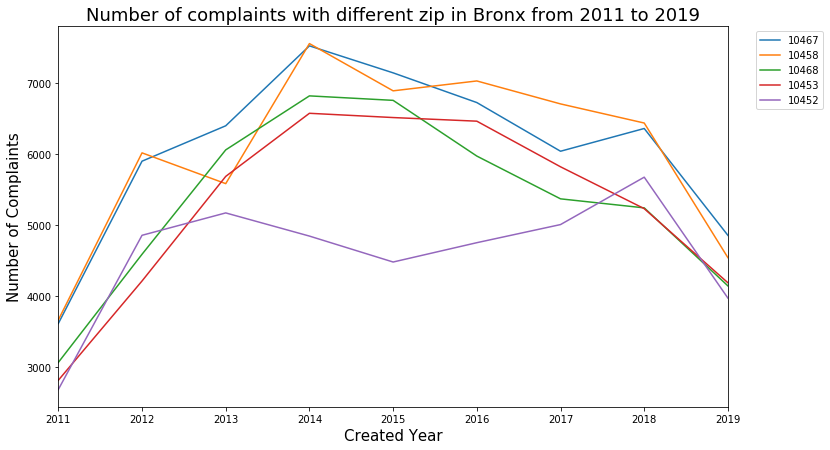

In [7]:
# define a function to plot the top 5 zip heating-related complaints in top 3 boroughs or top 5 street in top 5 zips of one borough from 2011 to 2019
def plot_top(borough='BRONX',groupcol='incident_zip',ncol=5,zips=[10458,10467,10468],title=' with different zip '):
    df_Borough = df_area[(df_area['borough']==borough) & (df_area['created_year']>2010)]
    if groupcol=='incident_zip':
        df = df_Borough.groupby(['created_year',groupcol]).count()['unique_key'].unstack()
    else:
        df = df_Borough[df_Borough['incident_zip'].isin(zips)].groupby(['created_year',groupcol]).count()['unique_key'].unstack()
    df.append(df.sum().to_frame().T).sort_values(by=0,axis=1,ascending=False)\
                                                .drop(index=0).iloc[:,:ncol]\
                                                .plot(figsize=(12,7))
    plt.xlabel('Created Year',fontsize=15)
    plt.ylabel('Number of Complaints',fontsize=15)
    plt.title('Number of complaints' + title + 'in ' + borough.capitalize() + ' from 2011 to 2019',fontsize=18)
    plt.legend(loc='upper right',bbox_to_anchor=(1.15,1))

# plot the top 5 zip heating-related complaints in Bronx from 2011 to 2019
plot_top()

* ### The top 3 zip codes that have the most heating-related complaints in Bronx from 2011 to 2019 are: 10458, 10467, 10468. And two of them are found in the three most heating-related complaints reported zip in NYC through the years. 

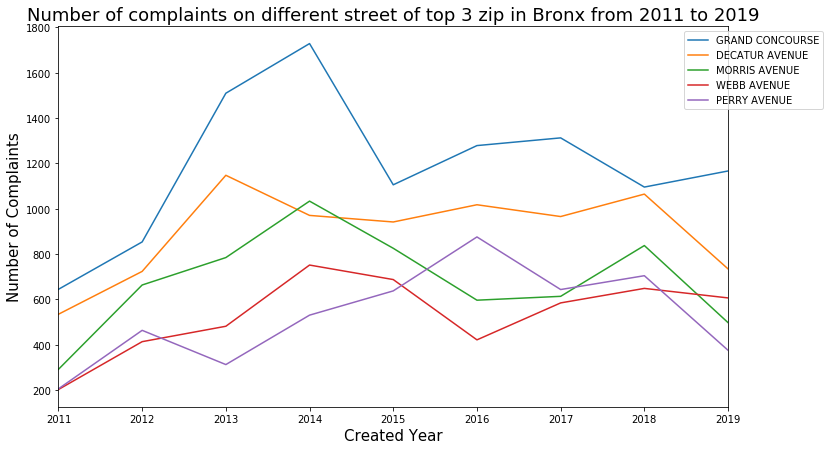

In [8]:
# plot the top 5 street heating-related complaints in Bronx from 2011 to 2019
plot_top(groupcol='street_name',title=' on different street of top 3 zip ')

* ### Heating-related complaints on Grand Concourse in Bronx are most from 2011 to 2019. 

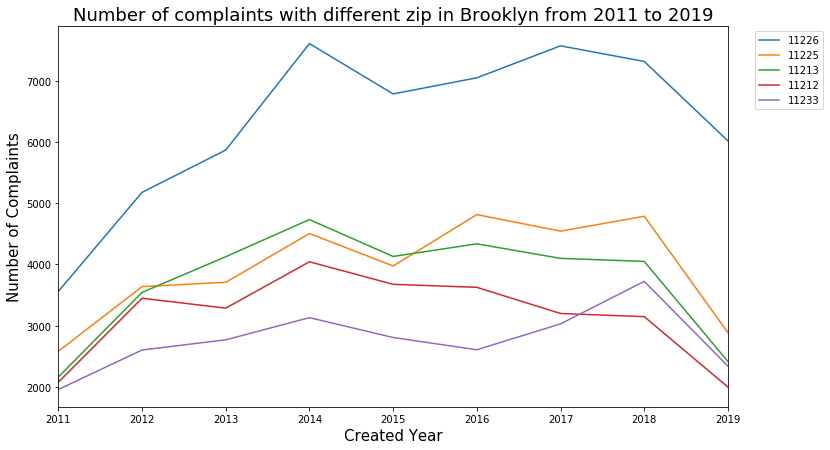

In [9]:
# plot the top 5 zip heating-related complaints in Brooklyn from 2011 to 2019
plot_top(borough='BROOKLYN')

* ### According the the figure above, it indicates that only the number of heating-related complaints in zip of 11226 in Brooklyn is comparable to that of top 3 in Bronx borough.  

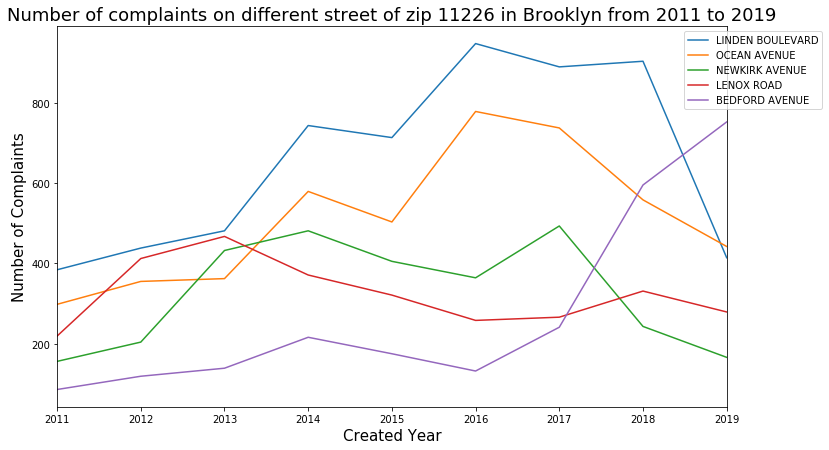

In [10]:
# plot the top 5 street heating-related complaints in Brooklyn from 2011 to 2019
plot_top(borough='BROOKLYN',groupcol='street_name',zips=[11226],title=' on different street of zip 11226 ')

* ### According the the figure above, it indicates that both Linden Blvd and Ocean Ave of zip 11226 in Brooklyn recieved most reported heating-related complaintsis. It should be noticed that complaints on Bedford Ave has increased significantly since 2017. But overall, they are much less found compared with that on Grand Concourse in Bronx.

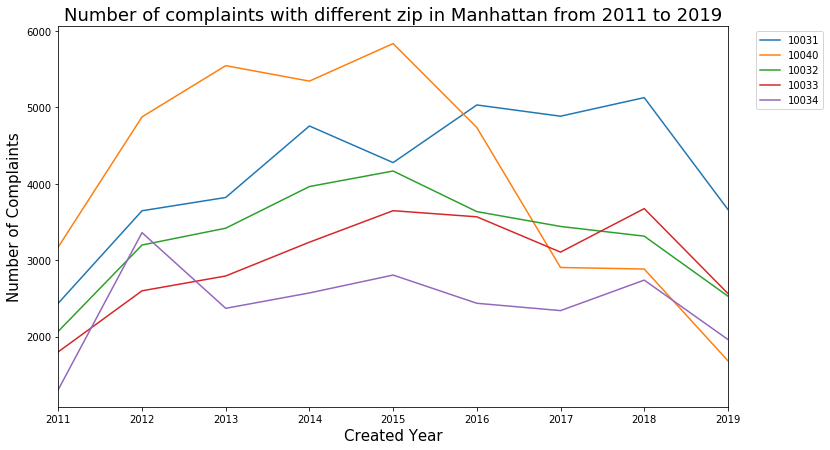

In [11]:
# plot the top 5 zip heating-related complaints in Manhattan from 2011 to 2019
plot_top(borough='MANHATTAN')

* ### The number of heating-related complaints in zip of 10031 and 10040 has opposite trend before 2019. Complaints in 10031, 10040, 10032, and 10033 are found to be the largest in Manhattan across the years. And the number is less than that of top 3 in Bronx.

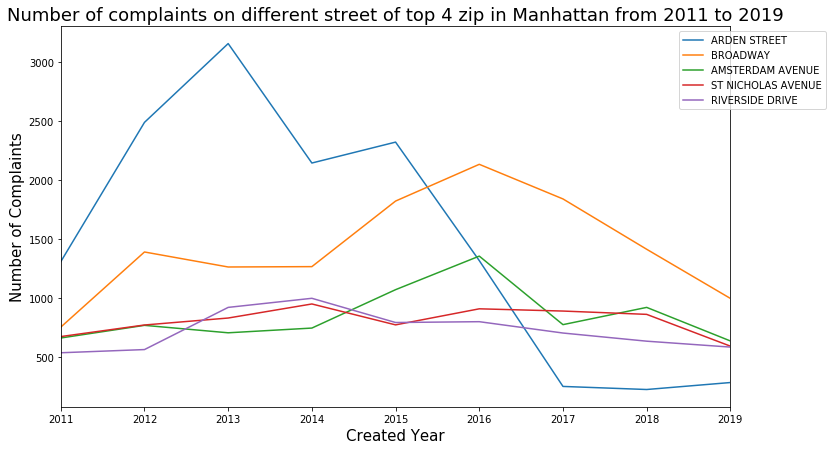

In [12]:
# plot the top 5 street heating-related complaints in Manhattan from 2011 to 2019
plot_top(borough='MANHATTAN',groupcol='street_name',zips=[10031,10040,10032,10033],title=' on different street of top 4 zip ')

* ### The figure above indicates that both Arden St and Broadway recieved most heating-related complaints in Manhattan from 2011 to 2019. However, the trends of the two streets are opposite. Complaints from Arden St dropped dramatically after 2016 while complaints from Broadway do not change that much and 2019 data is incomplete. So the priority should be on Broadway in Manhattan.

## Concluding Remarks I:
* ### The top priority of HPD to solve heating-related complaints should be on Grand Concourse of zip 10467/10458 in Bronx borough.
* ### Next, HPD should focus on heating-related complaints in Brooklyn borough, especially Liden Blvd/Ocean Ave/Bedford Ave with zip 11226. 
* ### In addition, HPD should also pay attention to the heating-related complaints from Broadway with zip 10031/10040 in Manhattan. 

* ## Let's focus only on heating-related complaints in Bronx area

In [13]:
df_BX = df_area[df_area['borough']=='BRONX']
df_BX['latitude'] = df_BX['latitude'].round(3).fillna(0.000)
df_BX['longitude'] = df_BX['longitude'].round(3).fillna(-0.000)
df_BX['processed_days'] = (df_BX['closed_date']-df_BX['created_date']).dt.days.fillna((pd.Timestamp.now()-df_BX['created_date']).dt.days).astype(int)
df_BX.reset_index(inplace=True)
df_BX.tail()

C:\Users\kekes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kekes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kekes\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,complaint_type,unique_key,created_date,status,resolution_description,location_type,borough,incident_zip,incident_address,street_name,address_type,city,latitude,longitude,closed_date,created_year,created_month,processed_days
576641,HEATING,27619052,2014-03-10,Closed,The Department of Housing Preservation and Dev...,RESIDENTIAL BUILDING,BRONX,10452,30 CLARKE PLACE EAST,CLARKE PLACE EAST,ADDRESS,BRONX,40.838,-73.918,2014-03-12,2014,3,2
576642,HEATING,27619053,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10468,2671 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,40.867,-73.896,2014-03-12,2014,3,2
576643,HEATING,27619058,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10453,170 WEST BURNSIDE AVENUE,WEST BURNSIDE AVENUE,ADDRESS,BRONX,40.854,-73.916,2014-03-11,2014,3,1
576644,HEATING,27619063,2014-03-10,Open,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10466,645 EAST 228 STREET,EAST 228 STREET,ADDRESS,BRONX,40.891,-73.861,NaT,2014,3,2079
576645,HEATING,27619069,2014-03-10,Closed,The complaint you filed is a duplicate of a co...,RESIDENTIAL BUILDING,BRONX,10454,526 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,40.807,-73.919,2014-03-12,2014,3,2


In [14]:
# since 2019 data is incomplete, index the last 4 years (2015-2018) heating related complaints and find the most-complaint address
df_addr = df_BX[df_BX['created_year'].isin(list(range(2015,2019)))]\
                                .groupby(['incident_address','latitude','longitude','incident_zip','street_name'])\
                                .agg({'unique_key':'count'})\
                                .sort_values(by='unique_key',ascending=False)
df_addr.reset_index(inplace=True)
df_addr.columns = ['addr','lat','lon','zip','st','cnt']
df_addr.head()

,addr,lat,lon,zip,st,cnt
0,1025 BOYNTON AVENUE,40.825,-73.877,10472,BOYNTON AVENUE,4673
1,2090 EAST TREMONT AVENUE,40.842,-73.858,10462,EAST TREMONT AVENUE,3292
2,2968 PERRY AVENUE,40.870,-73.884,10458,PERRY AVENUE,1904
3,888 GRAND CONCOURSE,40.827,-73.923,10451,GRAND CONCOURSE,1624
4,266 BEDFORD PARK BOULEVARD,40.871,-73.886,10458,BEDFORD PARK BOULEVARD,1554


In [15]:
# show top 10 addresses with most heat-related complaints in Bronx in the last 4 years in Google map
map_BX = folium.Map(location=[df_addr.loc[0,'lat'],df_addr.loc[0,'lon']],zoom_start=12,tiles='Stamen Terrain',width='80%',height='80%')
for idx,row in df_addr.iloc[:10,:4].iterrows():
    label = row['addr'] + ' ' + str(row['zip']) + ' Bronx'
    folium.Marker([row['lat'],row['lon']],popup=label).add_to(map_BX)
map_BX

* ### As shown in the Google map above, the top 10 addresses where heating-related complaints reported most in Bronx from 2015-2018 are well spread out, surggesting that focusing on specific street/zip may not be enough.